# K Means Clustering

kNN is one of the simplest of classification algorithms available for supervised learning. The idea is to search for
closest match of the test data in feature space .k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

## Algorithm

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters Κ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

1.Data Assignment Step

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if ci is the collection of centroids in set C, then each data point x is assigned to a cluster based on

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

where dist( · ) is the standard (L2) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be Si.

2.Centroid Udpate

In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

3.Choosing K

The algorithm described above finds the clusters and data set labels for a particular pre-chosen K. To find the number of clusters in the data, the user needs to run the K-means clustering algorithm for a range of K values and compare the results. In general, there is no method for determining exact value of K, but an accurate estimate can be obtained using the following techniques.

One of the metrics that is commonly used to compare results across different values of K is the mean distance between data points and their cluster centroid. Since increasing the number of clusters will always reduce the distance to data points, increasing K will always decrease this metric, to the extreme of reaching zero when K is the same as the number of data points. Thus, this metric cannot be used as the sole target. Instead, mean distance to the centroid as a function of K is plotted and the "elbow point," where the rate of decrease sharply shifts, can be used to roughly determine K.

A number of other techniques exist for validating K, including cross-validation, information criteria, the information theoretic jump method, the silhouette method, and the G-means algorithm. In addition, monitoring the distribution of data points across groups provides insight into how the algorithm is splitting the data for each K.

![Elbow Point](elbow_point.png)

K Means Function in Opencv

Input parameters
1. samples : It should be of np.float32 data type, and each feature should be put in a single column.
2. nclusters(K) : Number of clusters required at end
3. criteria [It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually,
it should be a tuple of 3 parameters. They are ( type, max_iter, epsilon ):]
    • 3.a - type of termination criteria [It has 3 flags as below:] cv2.TERM_CRITERIA_EPS
            - stop the algorithm iteration if specified accuracy, epsilon is reached.
            cv2.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of
            iterations, max_iter. cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER -
            stop the iteration when any of the above condition is met.
    • 3.b - max_iter - An integer specifying maximum number of iterations.
    • 3.c - epsilon - Required accuracy
4. attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The
algorithm returns the labels that yield the best compactness. This compactness is returned as output.
5. flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this :
cv2.KMEANS_PP_CENTERS and cv2.KMEANS_RANDOM_CENTERS.

Output parameters
    1. compactness : It is the sum of squared distance from each point to their corresponding centers.
    2. labels : This is the label array (same as ‘code’ in previous article) where each element marked ‘0’, ‘1’.....
    3. centers : This is array of centers of clusters.

Consider data with only one feature.Example would the t-shirt size

The data is created using matplotlib

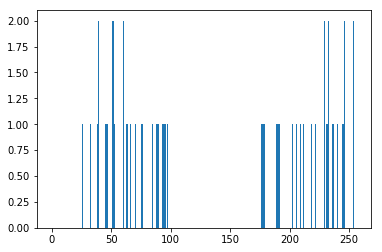

((array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
          2.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,
          0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
          0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256]),plt.show()

z is a array of size 50 with values in between 0 and 255. z is reshaped as a column vector.This will be useful in higher dimensional feature space.The criteria is such that, whenever 10 iterations of algorithm is ran, or an accuracy of epsilon = 1.0 is reached, stop the algorithm and return the answer

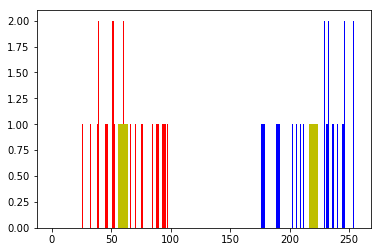

In [2]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(z,2,None,criteria,10,flags)

A = z[labels==0]
B = z[labels==1]

# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()


If flags = cv2.KMEANS_PP_CENTERS then

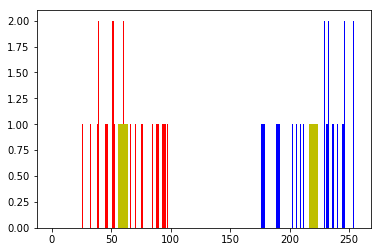

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_PP_CENTERS
compactness,labels,centers = cv2.kmeans(z,2,None,criteria,10,flags)

A = z[labels==0]
B = z[labels==1]

plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()

Note that the flag = cv2.KMEANS_RANDOM_CENTERS starts with a different initialization every thing and so the clusters and their centroids are different everytime the code is runned

To consider more than one feature space, the following example is considered

In the previous problem we only took the height for the tshirt classification.Now we will consider the weight aslo a feature

Each feature is arranged in a column, while each row corresponds to an input test sample.
For example, in this case, we set a test data of size 50x2, which are heights and weights of 50 people. First column
corresponds to height of all the 50 people and second column corresponds to their weights. First row contains two
elements where first one is the height of first person and second one his weight. Similarly remaining rows corresponds
to heights and weights of other people.

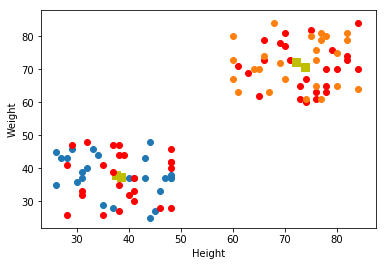

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

### Color Quantisation:

Color Quantization is the process of reducing number of colors in an image. One reason to do so is to reduce the
memory. Sometimes, some devices may have limitation such that it can produce only limited number of colors. In
those cases also, color quantization is performed. Here we use k-means clustering for color quantization.

There are 3 features, say, R,G,B.The the image has to be changed into a linear strip where each element is a pixel value (b,g,r).Then the cv2.kmeans function is applied to find the clusters and reduce the color space

In [11]:
import numpy as np
import cv2
img = cv2.imread('swan.jpeg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("swan_kmeans.jpeg",res2)

True

![swan_actual](swan.jpeg)

![swan_2](swan_2.jpeg)

### References

http://syskall.com/kmeans.js/

https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials